<a href="https://colab.research.google.com/github/AlinaStudyPM/UniversityML/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Считываем данные

In [ ]:
data = pd.read_csv('FLATS_FOR_11_PREZ.csv', encoding='utf-8', delimiter=';', index_col=0)
data

,SQUARE_METERS,METRO_DISTANCE,PRICE
Id,,,
601,28,677,7328400
602,54,120,9754600
603,43,1344,6781500
604,33,1003,6784100
605,30,591,7296200
...,...,...,...
696,28,2073,4826700
697,63,2120,6800800
698,33,1411,6517500


Выделяем независимые и зависмые переменные

In [ ]:
X1 = data[['SQUARE_METERS']]
X2 = data[['METRO_DISTANCE']]
X3 = data[['SQUARE_METERS', 'METRO_DISTANCE']]

Y = data['PRICE']

Разделяем данные на обучающую и тестовую выборки

In [ ]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y, test_size=0.2, random_state=42)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y, test_size=0.2, random_state=42)
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y, test_size=0.2, random_state=42)

Строим модели линейной регрессии

In [ ]:
model1 = LinearRegression()
model1.fit(X1_train, Y1_train)

LinearRegression()

In [ ]:
model2 = LinearRegression()
model2.fit(X2_train, Y2_train)

LinearRegression()

In [ ]:
model3 = LinearRegression()
model3.fit(X3_train, Y3_train)

LinearRegression()

Предсказываем значения

In [ ]:
#Набор точек для одномерной линейно регрессии по площади
X1_pred = np.linspace(X1.min(), X1.max(), 100).reshape(-1, 1)
Y1_pred = model1.predict(X1_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#Набор точек для одномерной линейной регресии по расстоянию до метро
X2_pred = np.linspace(X2.min(), X2.max(), 100).reshape(-1, 1)
Y2_pred = model2.predict(X2_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#Построим датасет
df_predictions1 = pd.DataFrame({
    'SQUARE_METERS': X1_pred.flatten(),
    'PRICE_predicted': Y1_pred
})
df_predictions1['PRICE_predicted'] = df_predictions1['PRICE_predicted'].apply(lambda x: f"{x:.2f}")
df_predictions1

,SQUARE_METERS,PRICE_predicted
0,12.000000,4744124.71
1,12.585859,4784526.02
2,13.171717,4824927.33
3,13.757576,4865328.64
4,14.343434,4905729.95
...,...,...
95,67.656566,8582249.29
96,68.242424,8622650.60
97,68.828283,8663051.91
98,69.414141,8703453.22


In [ ]:
#Построим датасет
df_predictions2 = pd.DataFrame({
    'METRO_DISTANCE': X2_pred.flatten(),
    'PRICE_predicted': Y2_pred
})
df_predictions2['PRICE_predicted'] = df_predictions2['PRICE_predicted'].apply(lambda x: f"{x:.2f}")
df_predictions2

,METRO_DISTANCE,PRICE_predicted
0,108.000000,8905564.71
1,132.131313,8862894.51
2,156.262626,8820224.32
3,180.393939,8777554.12
4,204.525253,8734883.92
...,...,...
95,2400.474747,4851896.02
96,2424.606061,4809225.83
97,2448.737374,4766555.63
98,2472.868687,4723885.43


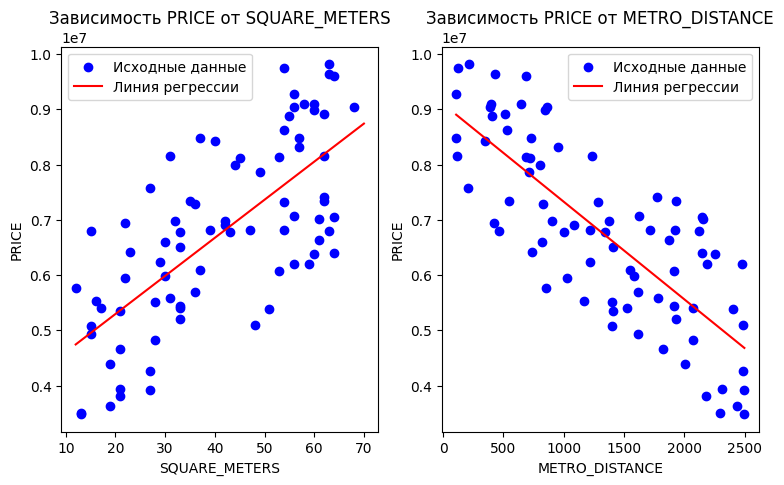

In [ ]:
#Отображаем результаты одномерной линейной регрессии
fig1 = plt.figure(figsize=(9, 5))

plt.subplot(1, 2, 1)
plt.scatter(X1_train, Y1_train, color='b', label="Исходные данные")
plt.plot(X1_pred, Y1_pred, color='r', label='Линия регрессии')
plt.title("Зависимость PRICE от SQUARE_METERS")
plt.xlabel('SQUARE_METERS')
plt.ylabel('PRICE')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X2_train, Y2_train, color='b', label="Исходные данные")
plt.plot(X2_pred, Y2_pred, color='r', label='Линия регрессии')
plt.title("Зависимость PRICE от METRO_DISTANCE")
plt.xlabel('METRO_DISTANCE')
plt.ylabel('PRICE')
plt.legend()

In [ ]:
#Набор точек для двумерной линейной регресии
X1_range = np.linspace(data['SQUARE_METERS'].min(), data['SQUARE_METERS'].max(), 100)
X2_range = np.linspace(data['METRO_DISTANCE'].min(), data['METRO_DISTANCE'].max(), 100)[::-1]
X1_grid, X2_grid = np.meshgrid(X1_range, X2_range)

X3_pred = pd.DataFrame({
    'SQUARE_METERS': X1_grid.ravel(),
    'METRO_DISTANCE': X2_grid.ravel()
})
Y3_pred = model3.predict(X3_pred)
Y3_pred_grid = Y3_pred.reshape(X1_grid.shape)

df_predictions3 = pd.DataFrame({
    'SQUARE_METERS': X1_grid.flatten(),
    'METRO_DISTANCE': X2_grid.flatten(),
    'PRICE_predicted': Y3_pred_grid.flatten()
})
df_predictions3['PRICE_predicted'] = df_predictions3['PRICE_predicted'].apply(lambda x: f"{x:.2f}")
df_predictions3

,SQUARE_METERS,METRO_DISTANCE,PRICE_predicted
0,12.000000,2497.0,3190385.89
1,12.585859,2497.0,3224980.89
2,13.171717,2497.0,3259575.90
3,13.757576,2497.0,3294170.90
4,14.343434,2497.0,3328765.90
...,...,...,...
9995,67.656566,108.0,10231614.79
9996,68.242424,108.0,10266209.80
9997,68.828283,108.0,10300804.80
9998,69.414141,108.0,10335399.80


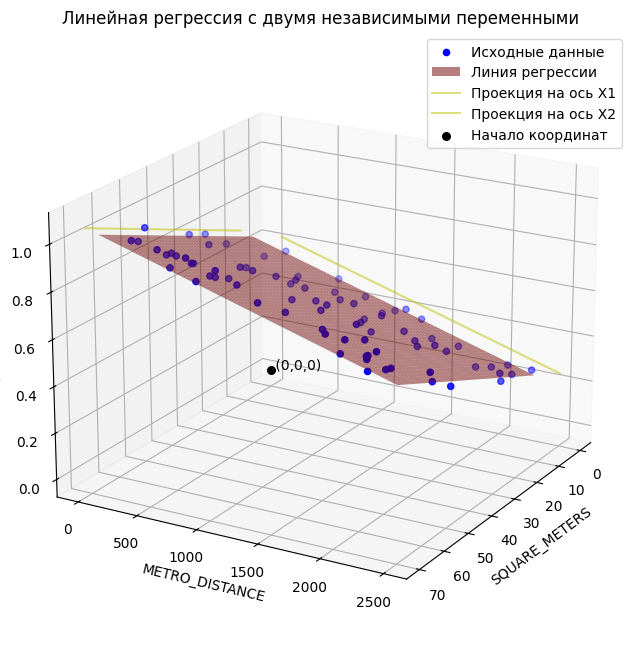

In [ ]:
#Оображаем результат для двумерной линейной регрессии

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X3_train['SQUARE_METERS'], X3_train['METRO_DISTANCE'], Y3_train, color='b', label='Исходные данные')

ax.plot_surface(X1_grid, X2_grid, Y3_pred_grid, color='r', alpha=0.5, label='Линия регрессии')
ax.plot(X1_range, np.zeros_like(X1_range), model3.intercept_ + model3.coef_[0] * X1_range, color='y', alpha=0.5, label='Проекция на ось X1')
ax.plot(np.zeros_like(X2_range), X2_range, model3.intercept_ + model3.coef_[1] * X2_range, color='y', alpha=0.5, label='Проекция на ось X2')

# Настройка вида
ax.view_init(elev=20, azim=30)
ax.scatter(0, 0, 0, color='k', s=30, label='Начало координат')
ax.text(0, 0, 0, " (0,0,0)", color='k')

# Подписи осей
ax.set_xlabel('SQUARE_METERS')
ax.set_ylabel('METRO_DISTANCE')
ax.set_zlabel('PRICE')
ax.set_title('Линейная регрессия с двумя независимыми переменными')

plt.legend()
plt.show()

Строим квадратичную регрессию

In [ ]:
quadratic = PolynomialFeatures(degree=2)
X1_quad = quadratic.fit_transform(X1_train)

model4 = LinearRegression()
model4.fit(X1_quad, Y1_train)

LinearRegression()

In [ ]:
quadratic = PolynomialFeatures(degree=2)
X2_quad = quadratic.fit_transform(X2_train)

model5 = LinearRegression()
model5.fit(X2_quad, Y2_train)

LinearRegression()

In [ ]:
quadratic = PolynomialFeatures(degree=2)
X3_quad = quadratic.fit_transform(X3_train)

model6 = LinearRegression()
model6.fit(X3_quad, Y3_train)

LinearRegression()

Предсказываем значения

In [ ]:
X4_pred = np.linspace(X1.min(), X1.max(), 100).reshape(-1, 1)
X4_quad_pred = quadratic.fit_transform(X4_pred)
Y4_pred = model4.predict(X4_quad_pred)

In [ ]:
X5_pred = np.linspace(X2.min(), X2.max(), 100).reshape(-1, 1)
X5_quad_pred = quadratic.fit_transform(X5_pred)
Y5_pred = model5.predict(X5_quad_pred)

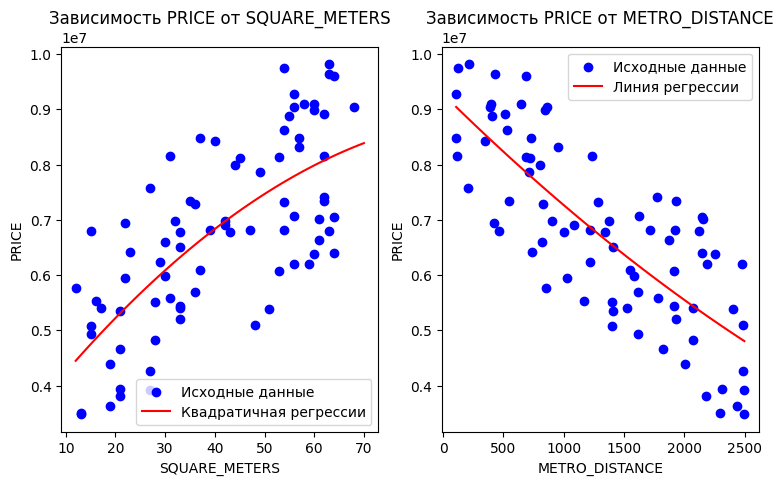

In [ ]:
fig4 = plt.figure(figsize=(9, 5))

plt.subplot(1, 2, 1)
plt.scatter(X1_train, Y1_train, color='b', label="Исходные данные")
plt.plot(X4_pred, Y4_pred, color='r', label='Квадратичная регрессии')
plt.title("Зависимость PRICE от SQUARE_METERS")
plt.xlabel('SQUARE_METERS')
plt.ylabel('PRICE')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X2_train, Y2_train, color='b', label="Исходные данные")
plt.plot(X5_pred, Y5_pred, color='r', label='Линия регрессии')
plt.title("Зависимость PRICE от METRO_DISTANCE")
plt.xlabel('METRO_DISTANCE')
plt.ylabel('PRICE')
plt.legend()

In [ ]:
intercept = model4.intercept_
coefficients = model4.coef_

equation = f'Y = {intercept} + {coefficients[1]}*X + {coefficients[2]}*X^2'
print(equation)

Y = 3148825.4077777583 + 115198.52837954297*X + -575.9800551136577*X^2


In [ ]:
intercept = model5.intercept_
coefficients = model5.coef_

equation = f'Y = {intercept} + {coefficients[1]}*X + {coefficients[2]}*X^2'
print(equation)

Y = 9276272.903627448 + -2154.93432901047*X + 0.14585683742916444*X^2


Двумерная линейная регрессия

In [ ]:
X1_range = np.linspace(data['SQUARE_METERS'].min(), data['SQUARE_METERS'].max(), 100)
X2_range = np.linspace(data['METRO_DISTANCE'].min(), data['METRO_DISTANCE'].max(), 100)[::-1]
X1_grid, X2_grid = np.meshgrid(X1_range, X2_range)

X6_pred = pd.DataFrame({
    'SQUARE_METERS': X1_grid.ravel(),
    'METRO_DISTANCE': X2_grid.ravel()
})
X6_quad_pred = quadratic.fit_transform(X6_pred)

Y6_pred = model6.predict(X6_quad_pred)
Y6_quad_pred = Y6_pred.reshape(X1_grid.shape)


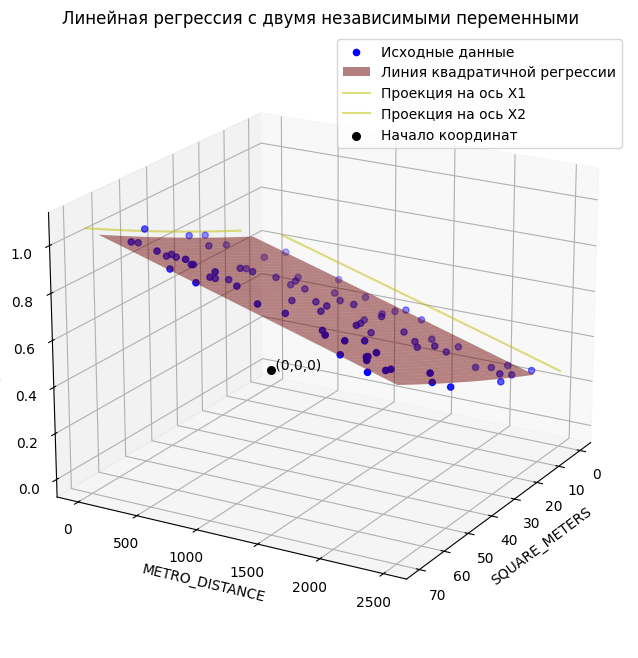

In [ ]:
#Оображаем результат для двумерной квадратичной регрессии

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X3_train['SQUARE_METERS'], X3_train['METRO_DISTANCE'], Y3_train, color='b', label='Исходные данные')

ax.plot_surface(X1_grid, X2_grid, Y6_quad_pred, color='r', alpha=0.5, label='Линия квадратичной регрессии')
ax.plot(X1_range, np.zeros_like(X1_range), model6.intercept_ + model6.coef_[1] * X1_range + model6.coef_[3] * X1_range * X1_range, color='y', alpha=0.5, label='Проекция на ось X1')
ax.plot(np.zeros_like(X2_range), X2_range, model6.intercept_ + model6.coef_[2] * X2_range + model6.coef_[5] * X2_range * X2_range, color='y', alpha=0.5, label='Проекция на ось X2')

# Настройка вида
ax.view_init(elev=20, azim=30)
ax.scatter(0, 0, 0, color='k', s=30, label='Начало координат')
ax.text(0, 0, 0, " (0,0,0)", color='k')

# Подписи осей
ax.set_xlabel('SQUARE_METERS')
ax.set_ylabel('METRO_DISTANCE')
ax.set_zlabel('PRICE')
ax.set_title('Линейная регрессия с двумя независимыми переменными')

plt.legend()
plt.show()

In [ ]:
#Уравнение поверхности Y
print(f'Y6 = {model6.intercept_} + {model6.coef_[1]}*X1 + {model6.coef_[2]}*X2 + {model6.coef_[3]}*X1^2 + {model6.coef_[4]}*X1*X2 + {model6.coef_[5]}*X2^2')

Y6 = 6526346.402414857 + 50962.22767641224*X1 + -1539.140911568947*X2 + 103.24489347130464*X1^2 + -0.14332525216434533*X1*X2 + -0.011517924584040884*X2^2


In [ ]:
#Уравнение проекции Y на ось X1
print(f'Y_X1 = {model6.intercept_} + {model6.coef_[1]}*X1 + {model6.coef_[3]}*X1^2')

Y_X1 = 6526346.402414857 + 50962.22767641224*X1 + 103.24489347130464*X1^2


In [ ]:
#Уравнение проекции Y на ось X2
print(f'Y_X2 = {model6.intercept_} + {model6.coef_[2]}*X2 + {model6.coef_[5]}*X2^2')

Y_X2 = 6526346.402414857 + -1539.140911568947*X2 + -0.011517924584040884*X2^2


Оценка качества прогнозирования

In [ ]:
Y1_pred_test = model1.predict(X1_test)
Y2_pred_test = model2.predict(X2_test)
Y3_pred_test = model3.predict(X3_test)

X1_quad_test = quadratic.fit_transform(X1_test)
X2_quad_test = quadratic.fit_transform(X2_test)
X3_quad_test = quadratic.fit_transform(X3_test)

Y4_pred_test = model4.predict(X1_quad_test)
Y5_pred_test = model5.predict(X2_quad_test)
Y6_pred_test = model6.predict(X3_quad_test)

In [160]:
metrics_df = pd.DataFrame(columns=["Model", "MAE", "RMSE", "MPE(%)", "MAPE(%)", "AD", "MAD", "R2"])

In [161]:
def calculate_metrics(model_name, y_test, y_pred):
    precision = 4;
    mae = round(mean_absolute_error(y_test, y_pred), precision)
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), precision)
    mpe = round(np.mean((y_test - y_pred) / y_test) * 100, precision)
    mape = round(np.mean(np.abs(y_test - y_pred) / y_test) * 100, precision)
    ad = round(np.sum(np.abs(y_test - y_pred)), precision)
    mad = round(np.mean(np.abs(y_test - y_pred)), precision)
    r2 = round(r2_score(y_test, y_pred), precision)

    metrics_df.loc[len(metrics_df)] = [model_name, mae, rmse, mpe, mape, ad, mad, r2]

In [162]:
calculate_metrics("Линейная регрессия по SQUARE_METERS", Y1_test, Y1_pred_test)
calculate_metrics("Линейная регрессия по METRO_DISTANCE", Y2_test, Y2_pred_test)
calculate_metrics("Двумерная линейная регрессия", Y3_test, Y3_pred_test)
calculate_metrics("Квадратичная регрессия по SQUARE_METERS", Y1_test, Y4_pred_test)
calculate_metrics("Квадратичная регрессия по METRO_DISTANCE", Y2_test, Y5_pred_test)
calculate_metrics("Двумерная квадратичная регрессия", Y3_test, Y6_pred_test)
metrics_df

,Model,MAE,RMSE,MPE(%),MAPE(%),AD,MAD,R2
0,Линейная регрессия по SQUARE_METERS,1.050926e+06,1.161069e+06,5.7981,14.6386,2.101853e+07,1.050926e+06,-0.1615
1,Линейная регрессия по METRO_DISTANCE,8.703575e+05,1.029469e+06,0.2508,11.9971,1.740715e+07,8.703575e+05,0.0869
2,Двумерная линейная регрессия,2.068554e+05,2.617991e+05,1.8005,2.7978,4.137109e+06,2.068554e+05,0.9409
3,Квадратичная регрессия по SQUARE_METERS,1.039128e+06,1.160919e+06,5.7959,14.5954,2.078255e+07,1.039128e+06,-0.1612
4,Квадратичная регрессия по METRO_DISTANCE,8.931225e+05,1.050436e+06,0.6431,12.2829,1.786245e+07,8.931225e+05,0.0493
5,Двумерная квадратичная регрессия,2.029907e+05,2.625137e+05,1.7723,2.7316,4.059813e+06,2.029907e+05,0.9406


Старый код

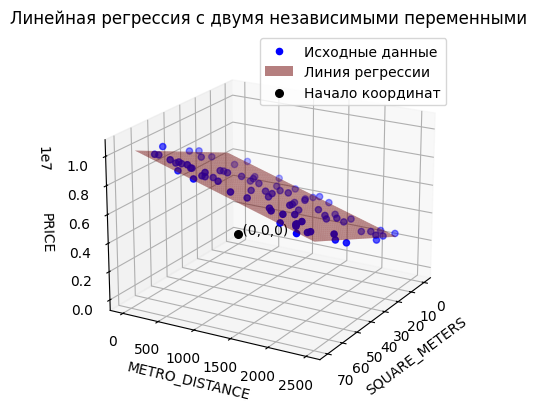

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X3_train['SQUARE_METERS'], X3_train['METRO_DISTANCE'], Y3_train, color='b', label='Исходные данные')

ax.plot_surface(X1_grid, X2_grid, Y3_pred_grid, color='r', alpha=0.5, label='Линия регрессии')

ax.view_init(elev=20, azim=30)

ax.scatter(0, 0, 0, color='k', s=30, label='Начало координат')
ax.text(0, 0, 0, " (0,0,0)", color='k')



ax.set_xlabel('SQUARE_METERS')
ax.set_ylabel('METRO_DISTANCE')
ax.set_zlabel('PRICE')
ax.set_title('Линейная регрессия с двумя независимыми переменными')

plt.legend()
plt.show()